##### Sumber dataset: https://www.kaggle.com/abineshkumark/carsdata/version/1#
##### Tujuan melakukan pada data adalah mengelompokkan data-data menjadi 3 kelompok, berdasarkan atribut-atribut yang ada.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 500)

In [4]:
df = pd.read_csv('dataset-s1.csv')

In [5]:
# Preprocessing
columns = []

# Terdapat beberapa value yang tidak NaN,namun hanyalah sebuah spasi. Saya akan menggantinya dengan null.
df.replace(" ", np.nan, inplace=True)

# Menghapus spasi pada setiap nama kolom
for column in df.columns:
    columns.append(column.strip(" "))
    
df.columns = columns

# Terdapat beberapa kolom yang nilainya string angka (contoh: '151', '218', dll).
# Saya akan mengganti tipe string tersebut menjadi float
for column in df.columns:
    if column != 'brand':
        df[column] = df[column].astype(float)
 
# Membuang row yang memiliki nilai null
df.dropna(inplace=True)

# Memisahkan data menjadi fitur dan label
features = df.drop('brand', axis=1)
labels = df['brand']

In [6]:
from sklearn.cluster import KMeans

N_CLUSTERS = 3
k_means_model = KMeans(n_clusters=N_CLUSTERS).fit(features)

centroids = np.array(k_means_model.cluster_centers_)

LABEL_COLOR_MAP = {
    0 : 'r', # Merah
    1 : 'b', # Biru
    2 : 'g'  # Hijau
}
pred_classes = k_means_model.predict(features)

label_color = [LABEL_COLOR_MAP[l] for l in k_means_model.labels_]
plt.figure(figsize=(10, 7))  

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [7]:
# Membuat semua kombinasi 2 buah fitur
import itertools
combinations = list(itertools.combinations(features.columns, 2))

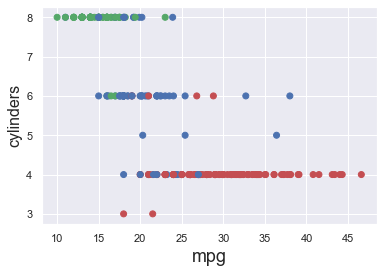

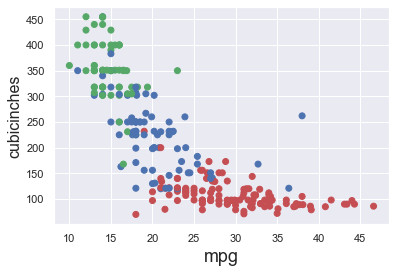

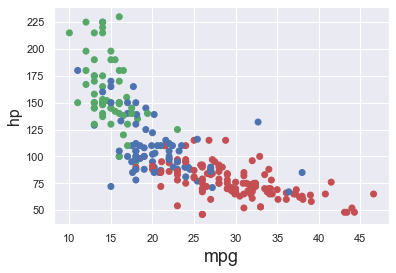

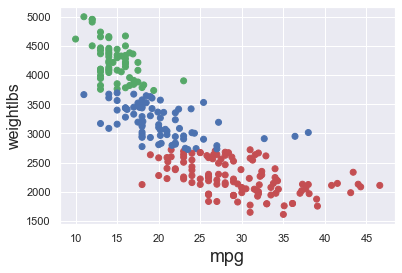

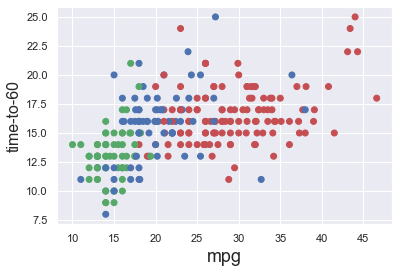

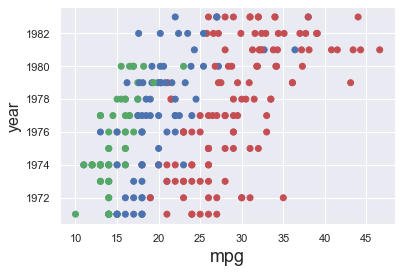

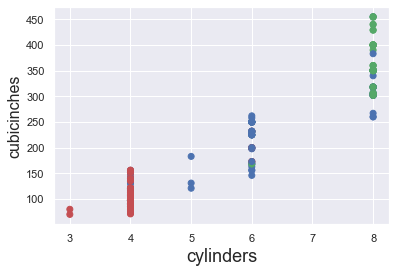

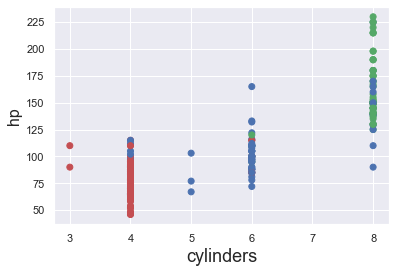

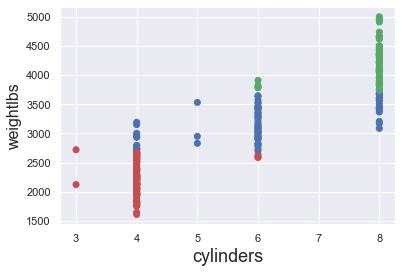

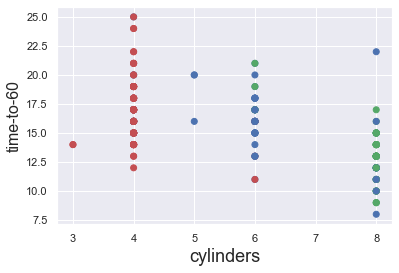

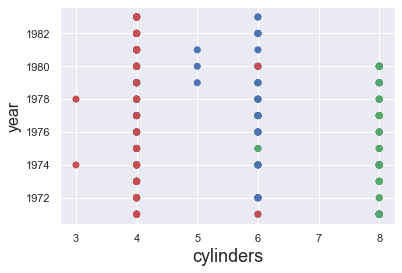

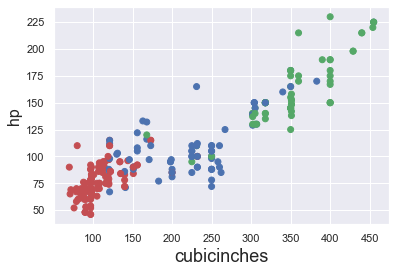

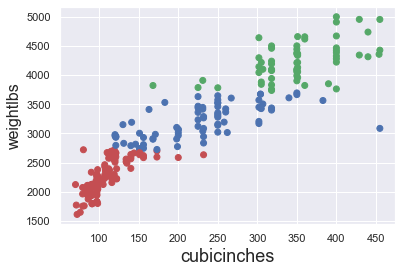

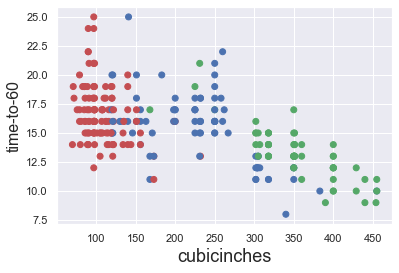

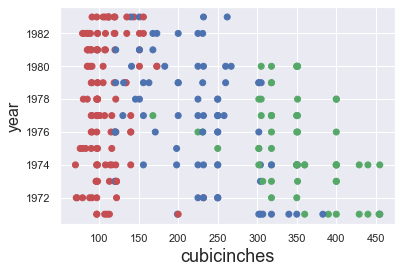

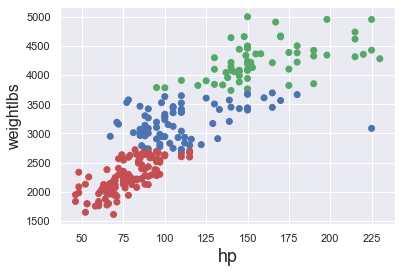

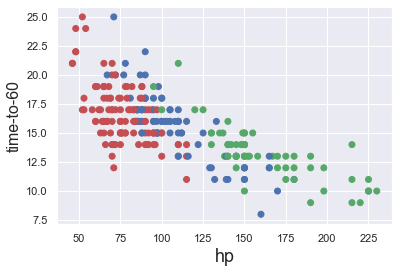

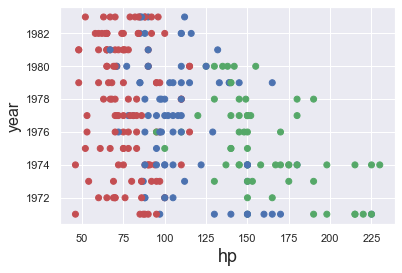

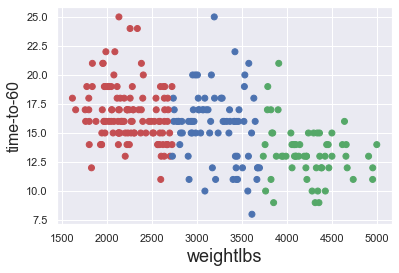

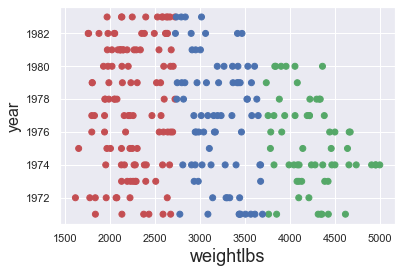

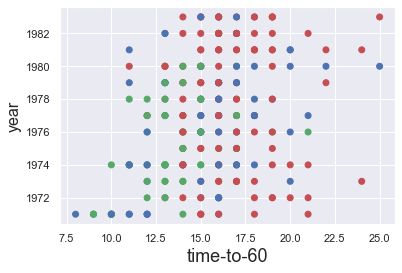

In [8]:
# Menampilkan visualisasi dari setiap pair yang mungkin
for combi in combinations:
    plt.scatter(features[combi[0]], features[combi[1]], c=label_color)
    plt.xlabel(combi[0], fontsize=18)
    plt.ylabel(combi[1], fontsize=16)
    plt.show()
    

 
##### Berdasarkan hasil plot di atas, saya melihat korelasi yang cukup jelas antara pasangan-pasangan atribut, kecuali pada perbandingan 'time-to-60' dan 'year', di situ tidak terlihat adanya keterkaitan.
##### Bisa dilihat korelasi antar pasangan atribut, apabila atribut satunya semakin tinggi maka atribut lainnya semakin rendah, dsb.

In [12]:
from sklearn.metrics import silhouette_score 
score = silhouette_score(features, k_means_model)

clusterer = KMeans(n_clusters=N_CLUSTERS, random_state=10)
cluster_labels = clusterer.fit_predict(features)
silhouette_avg = silhouette_score(features, cluster_labels)
print(silhouette_avg)

ValueError: bad input shape ()

ValueError: bad input shape ()